# 파일 다운로드

In [2]:
import sys
from pandas import read_csv, pivot_table, melt
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
plt.rcParams['font.family'] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.dpi'] = 200
plt.rcParams['axes.unicode_minus'] = False

In [4]:
# origin1 = read_csv('C:/Users/kimjh/산대특_데이터분석 알고리즘 개발/megaIT_da/2차 프로젝트/시간대별 카드 이용금액 현황_제주데이터랩(180101-231031).csv')
# origin2 = read_csv('C:/Users/kimjh/산대특_데이터분석 알고리즘 개발/megaIT_da/2차 프로젝트/업종별성별외식업이용정보_제주데이터랩(180101-231031).csv')
origin1 = read_csv('C:/Users/kimjh/산대특_데이터분석 알고리즘 개발/megaIT_da/2차 프로젝트/업종별성별카드이용정보_제주데이터랩(180101-231031).csv', encoding='euc-kr')

In [5]:
origin1.head()

,연월,업종명,이용자구분,성별,이용자수,이용건수,이용금액
0,201801,건강보조식품 소매업,기타외국,알수없음,65,78,101523250
1,201801,건강보조식품 소매업,내국인,남성,159,165,25558470
2,201801,건강보조식품 소매업,내국인,알수없음,1,1,396000
3,201801,건강보조식품 소매업,내국인,여성,200,218,32041740
4,201801,건강보조식품 소매업,동남아,알수없음,8,8,1550000


In [12]:
origin1['이용자구분'].value_counts()

이용자구분
내국인     6376
제주도민    5616
법인      2795
중국      1878
기타외국    1865
일본      1113
동남아     1001
Name: count, dtype: int64

In [13]:
tmp = origin1.query('이용자구분 != "제주도민"')

In [ ]:
tmp['이용자구분'] = origin1['이용자구분'].astype('category')
tmp['성별'] = origin1['성별'].astype('category')
tmp['업종명'] = origin1['업종명'].astype('category')

In [6]:
origin1.dtypes

연월        int64
업종명      object
이용자구분    object
성별       object
이용자수      int64
이용건수      int64
이용금액      int64
dtype: object

In [7]:
df = origin1.copy()

df['이용자구분'] = origin1['이용자구분'].astype('category')
df['성별'] = origin1['성별'].astype('category')
df['업종명'] = origin1['업종명'].astype('category')

In [8]:
df.dtypes

연월          int64
업종명      category
이용자구분    category
성별       category
이용자수        int64
이용건수        int64
이용금액        int64
dtype: object

In [9]:
pivot1 = pivot_table(df,
                     index='연월',
                     columns='업종명',
                     values='이용자수',
                     aggfunc='sum')
pivot1.head()

업종명,건강보조식품 소매업,골프장 운영업,과실 및 채소 소매업,관광 민예품 및 선물용품 소매업,그외 기타 분류안된 오락관련 서비스업,그외 기타 스포츠시설 운영업,그외 기타 종합 소매업,기타 갬블링 및 베팅업,기타 대형 종합 소매업,기타 수상오락 서비스업,...,중식 음식점업,차량용 가스 충전업,차량용 주유소 운영업,체인화 편의점,택시 운송업,"피자, 햄버거, 샌드위치 및 유사 음식점업",한식 음식점업,호텔업,화장품 및 방향제 소매업,휴양콘도 운영업
연월,,,,,,,,,,,,,,,,,,,,,
201801,1575,14374,34108,21600,85,530,43061,22,126914,24,...,46278,17203,257394,796839,0,104049,788365,14690,19981,16411
201802,2036,13252,31297,17357,84,420,39853,26,115479,26,...,38078,14874,230760,706200,0,93171,664379,12676,20399,12035
201803,1924,26014,35472,21811,68,622,41267,30,120032,40,...,46702,15714,272855,827453,0,102558,810639,13482,20679,14187
201804,2137,30505,42736,26988,66,942,42480,17,116830,58,...,47118,14344,271324,859882,0,107446,842192,14003,21245,15975
201805,2275,33080,37852,26814,123,1051,45488,18,129313,61,...,48684,14413,275597,956867,0,115484,866546,16621,23299,18382


In [10]:
pivot1.value_counts()

건강보조식품 소매업  골프장 운영업  과실 및 채소 소매업  관광 민예품 및 선물용품 소매업  그외 기타 분류안된 오락관련 서비스업  그외 기타 스포츠시설 운영업  그외 기타 종합 소매업  기타 갬블링 및 베팅업  기타 대형 종합 소매업  기타 수상오락 서비스업  기타 외국식 음식점업  기타 주점업  기타음?식료품위주종합소매업  기타음식료품위주종합소매업  내항 여객 운송업  마사지업  면세점    버스 운송업  비알콜 음료점업  빵 및 과자류 소매업  서양식 음식점업  수산물 소매업  슈퍼마켓    스포츠 및 레크레이션 용품 임대업  여관업    여행사업  욕탕업    육류 소매업  일반유흥 주점업  일식 음식점업  자동차 임대업  전시 및 행사 대행업  정기 항공 운송업  중식 음식점업  차량용 가스 충전업  차량용 주유소 운영업  체인화 편의점  택시 운송업  피자, 햄버거, 샌드위치 및 유사 음식점업  한식 음식점업  호텔업    화장품 및 방향제 소매업  휴양콘도 운영업
974         25396    39365        36602              94                    1014             27090         0             60779         111           15163        2302    0               93707          8218       177   64675  0       121685    103446       178552    29327    355288  17518               32115  4206  7316   20177   3277      35345    18091    32323        23246      48648    14061       218123       726332   32      90392                    615876   16047  6859           13483       1

In [ ]:
증감률이랑 막대그래프로

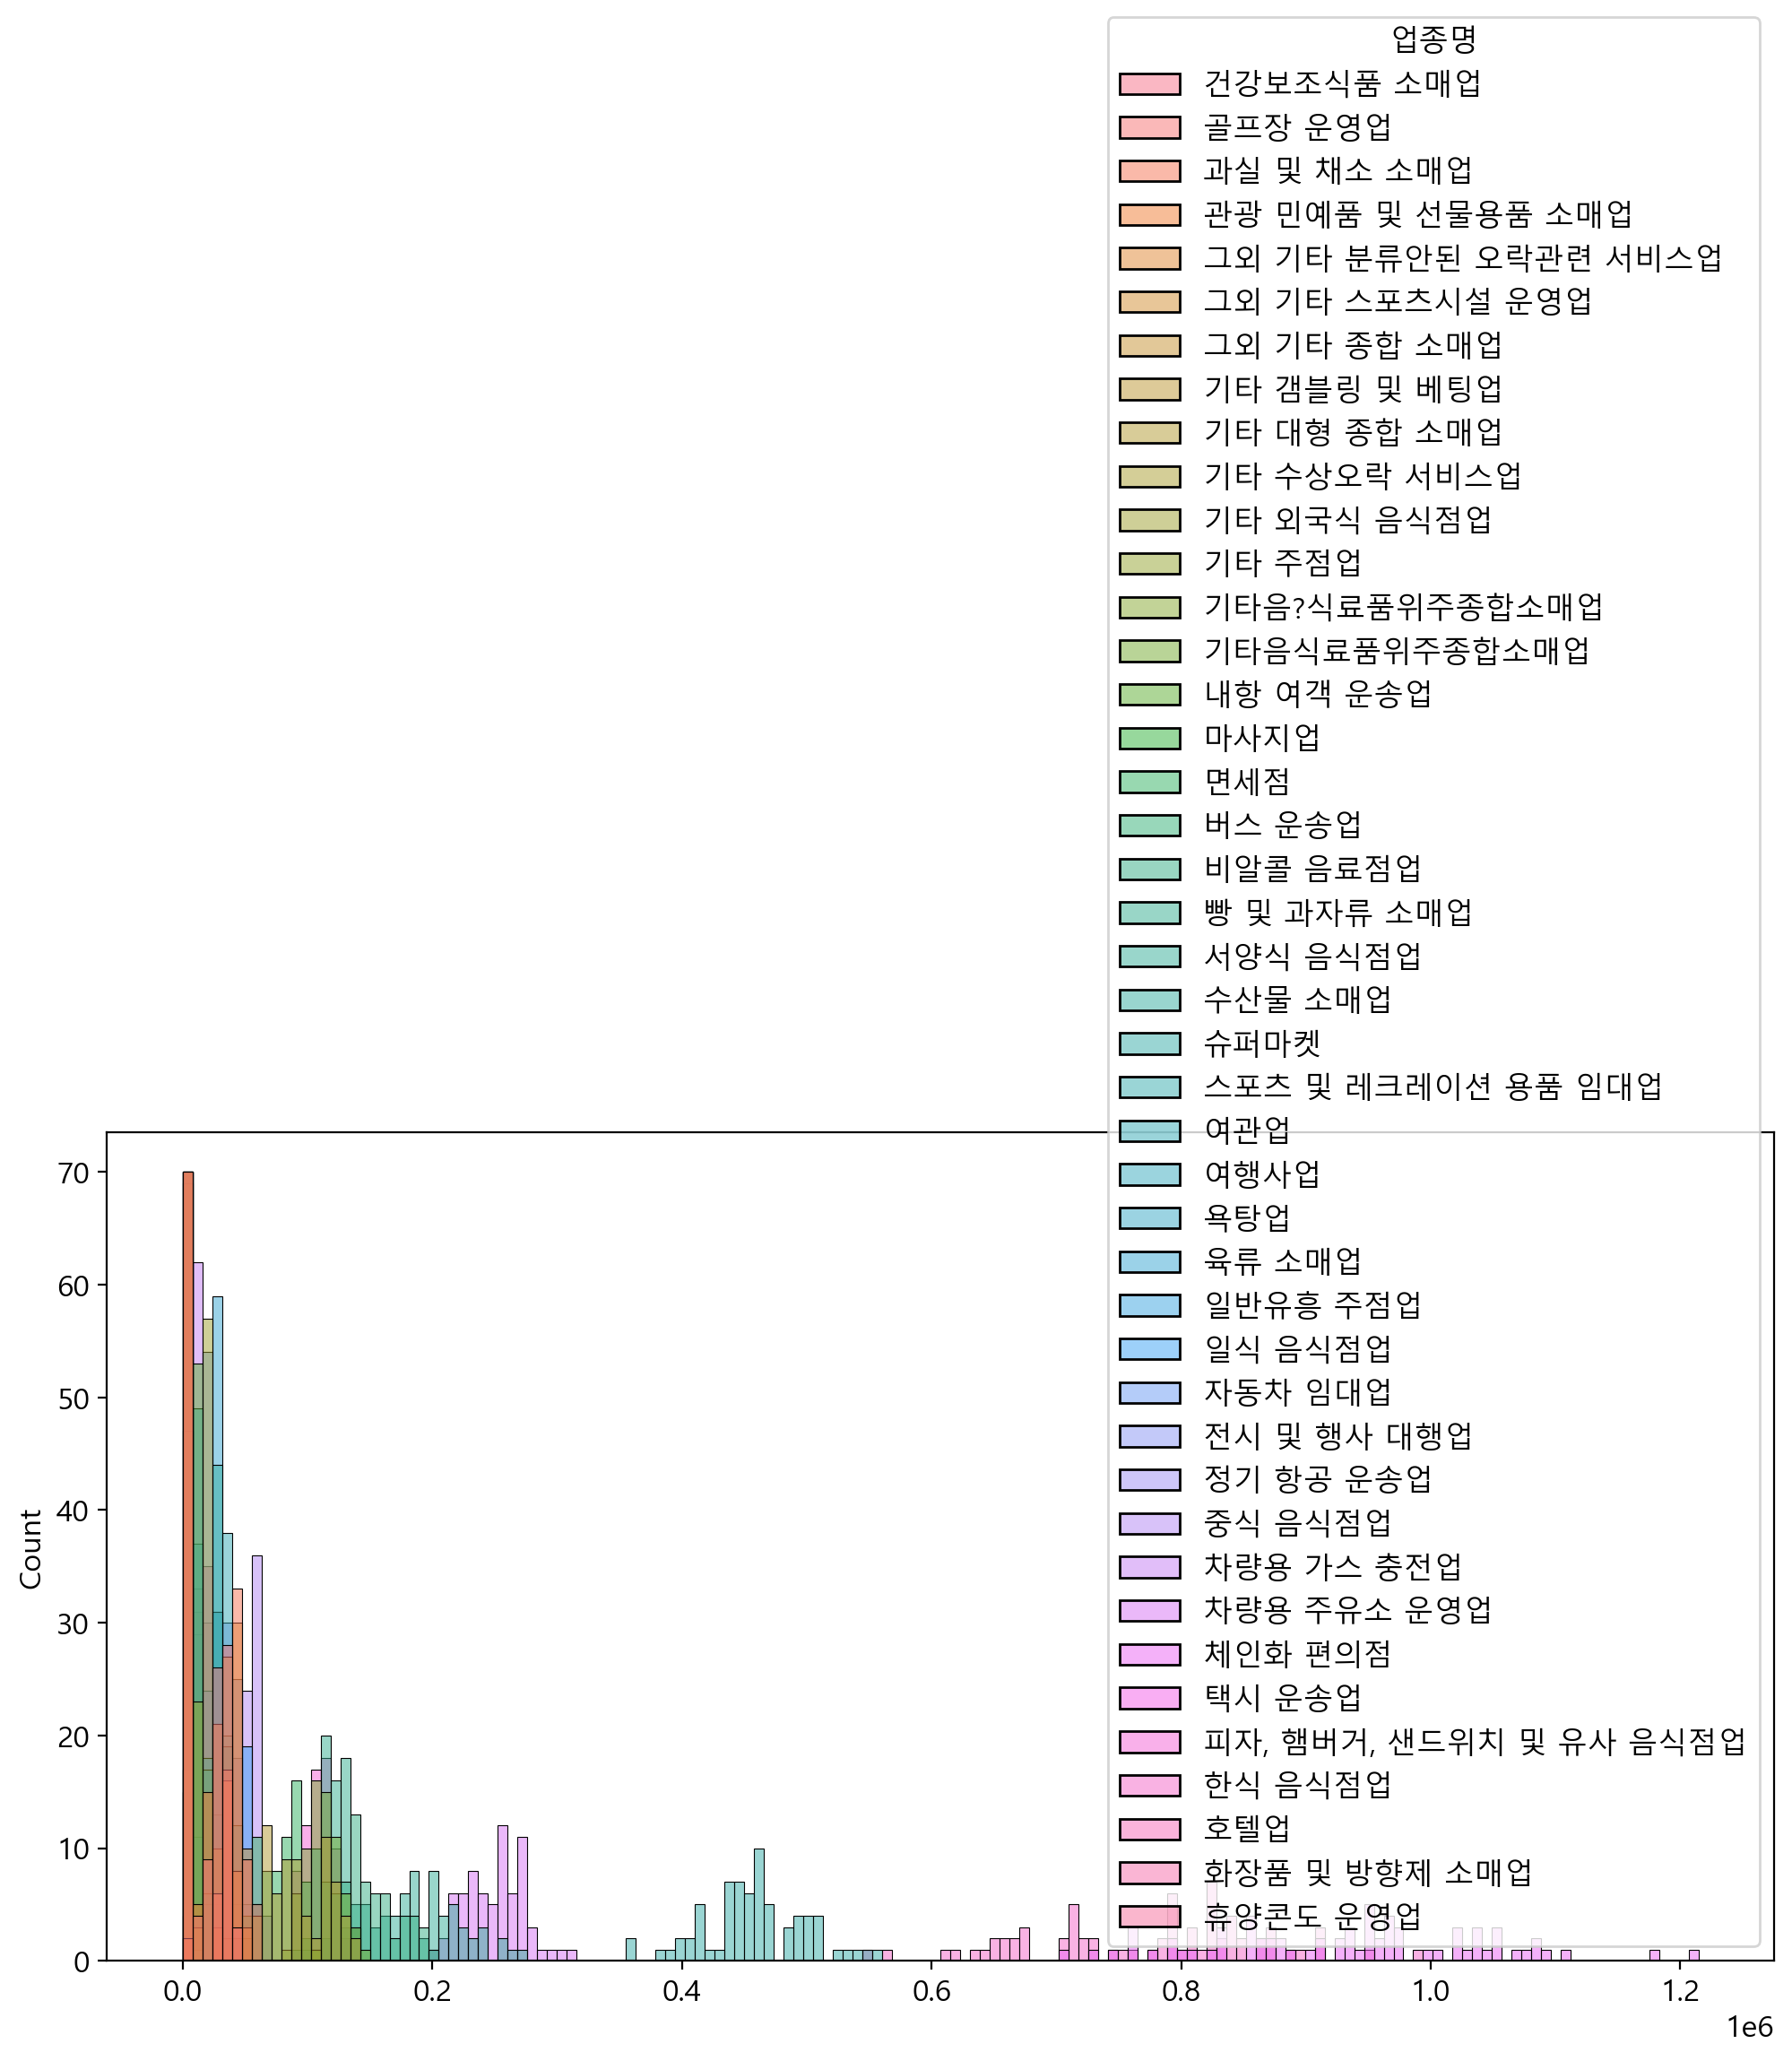

In [11]:
plt.figure()
sns.histplot(data=pivot1)
plt.show()
plt.close()